<a href="https://colab.research.google.com/github/IGVF/seqspec/blob/main/examples/seqspec-dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -rf seqspec
!git clone https://github.com/igvf/seqspec
!cd seqspec && pip install --quiet .

Cloning into 'seqspec'...
remote: Enumerating objects: 1650, done.
remote: Counting objects: 100% (288/288), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 1650 (delta 211), reused 246 (delta 185), pack-reused 1362
Receiving objects: 100% (1650/1650), 576.46 MiB | 24.37 MiB/s, done.
Resolving deltas: 100% (1092/1092), done.
Updating files: 100% (205/205), done.
  Preparing metadata (setup.py) ... done


In [2]:
!seqspec

usage: seqspec
       [-h]
       <CMD>
       ...

seqspec
0.0.0:
Format
sequence sp
ecification
files

positional arguments:
  <CMD>
    check
    validate
    seqspec
    file
    find
    find
    regions in
    a seqspec
    file
    format
    format
    seqspec
    file
    index
    index
    regions in
    a seqspec
    file
    init
    init a
    seqspec
    file
    onlist
    get onlist
    file for
    specific
    regions
    print
    print
    seqspec
    file
    split
    split
    regions in
    a seqspec
    file

options:
  -h, --help
    show this
    help
    message and
    exit


In [3]:
!head seqspec/specs/10x-RNA-v2/spec.yaml

!Assay
seqspec_version: 0.0.0
assay: null
sequencer: null
name: 10x-RNA-v2
doi: https://doi.org/10.1038/ncomms14049
publication_date: null
description: The 10x Genomics Chromium Single Cell 3' Solution V2 chemistry
modalities:
- RNA


In [4]:
!seqspec print seqspec/specs/10x-RNA-v2/spec.yaml

                                        ┌─'illumina_p5:29'
                                        ├─'truseq_read1:10'
                                        │                   ┌─'barcode:16'
                                        ├─R1.fastq.gz───────┤
                                        │                   └─'umi:10'
─────────────────── ──RNA───────────────┤
                                        ├─R2.fastq.gz────── ──'cDNA:98'
                                        ├─'truseq_read2:34'
                                        ├─I1.fastq.gz────── ──'index7:8'
                                        └─'illumina_p7:24'


In [5]:
!seqspec check seqspec/specs/10x-RNA-ATAC/spec.yaml

[error 1] None is not of type 'string' in spec['assay']
[error 2] None is not of type 'string' in spec['sequencer']
[error 3] 'RNA' is not one of ['rna', 'tag', 'protein', 'atac', 'crispr'] in spec['modalities'][0]
[error 4] 'ATAC' is not one of ['rna', 'tag', 'protein', 'atac', 'crispr'] in spec['modalities'][1]
[error 5] 'RNA' is not one of ['atac', 'barcode', 'cdna', 'crispr', 'fastq', 'gdna', 'hic', 'illumina_p5', 'illumina_p7', 'index5', 'index7', 'linker', 'ME1', 'ME2', 'methyl', 'nextera_read1', 'nextera_read2', 'poly_A', 'poly_G', 'poly_T', 'poly_C', 'protein', 'rna', 's5', 's7', 'tag', 'truseq_read1', 'truseq_read2', 'umi'] in spec['library_spec'][0]['region_type']
[error 6] None is not of type 'string' in spec['library_spec'][0]['regions'][2]['sequence_type']
[error 7] None is not one of ['fixed', 'random', 'onlist', 'joined'] in spec['library_spec'][0]['regions'][2]['sequence_type']
[error 8] None is not of type 'string' in spec['library_spec'][0]['regions'][2]['regions'][0]

In [6]:
!seqspec index -m RNA -r R1.fastq.gz seqspec/specs/10x-RNA-v3/spec.yaml

R1.fastq.gz	barcode	0	16
R1.fastq.gz	umi	16	28


In [7]:
!seqspec index --rev -m RNA -r R2.fastq.gz seqspec/specs/10x-RNA-v3/spec.yaml

R2.fastq.gz	cDNA	0	98


In [8]:
!seqspec find -m RNA -r barcode seqspec/specs/10x-RNA-v3/spec.yaml

- !Region
  region_id: barcode
  region_type: barcode
  name: Cell Barcode
  sequence_type: onlist
  sequence: NNNNNNNNNNNNNNNN
  min_len: 16
  max_len: 16
  onlist: !Onlist
    filename: 737K-august-2016.txt.gz
    md5: null
  regions: null
  parent_id: R1.fastq.gz



# Plot assays over time

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.dates as mdates
fsize=15

plt.rcParams.update({'font.size': fsize})
%config InlineBackend.figure_format = 'retina'

In [10]:
!for s in /content/seqspec/specs/*/spec.yaml; do grep -e name -e publication_date $s | head -2 | sed 's/\: /:/g' | cut -f 2 -d":" | tr '\n' '\t' && echo -e "\n"; done > dates.txt

In [11]:
df = pd.read_csv("dates.txt", header=None, names=["assay", "publication_date", "bad"], sep="\t").drop(columns=["bad"]).dropna()

In [12]:
fmt = "%d %B %Y"
dates = [datetime.strptime(d, fmt) for d in df["publication_date"]]
descriptions = df["assay"]
levels = np.tile([-9,9-7,7,-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/8)))[:len(dates)]

ValueError: ignored

In [ ]:
# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(25, 10))

ax.vlines(dates, 0, levels, color="grey", alpha=0.5)  # The vertical stems.
ax.plot(dates, np.zeros_like(dates), "-o", color="k", markerfacecolor="w")  # Baseline and markers on it.
# ax.plot(new_cases.index.values, new_cases.values/new_cases.max()*10, color="lightgrey", label="New cases", zorder = -2)
# annotate lines
for d, l, desc in zip(dates, levels, descriptions):

  weight = "light"
  # if tl["highlight"]:
  #   weight = "bold"
  ax.annotate(desc, xy=(d, l),
              xytext=(-3, np.sign(l)*3), textcoords="offset points",
              horizontalalignment="center",
              verticalalignment="bottom" if l > 0 else "top", weight=weight)

# format xaxis with 4 month intervals
ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=3))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

# ax.axvline(x=datetime.strptime("January 01, 2021", fmt), color="lightgrey", linestyle="--", zorder=-1)
ax.margins(y=0.1)
ax.set(**{
    "title": ""
})

fig.show()

# Code testing

In [13]:
from seqspec.utils import load_spec, get_cuts
from seqspec.seqspec_index import run_index
from seqspec.seqspec_find import run_find
import os

In [14]:
specA = load_spec("seqspec/specs/10x-RNA-v3/spec.yaml")
specB = load_spec("seqspec/specs/SPLiT-seq/spec.yaml")

# modality
mA = "RNA"
mB = "RNA"

modeA = specA.get_modality(mA)
modeB = specB.get_modality(mA)

# Get the regions from specA based on the FASTQ file names
fqA_fns = ["data/R1.fastq.gz", "data/R2.fastq.gz"]
fqB_fns = ["data/R1.fastq.gz", "data/R2.fastq.gz"]



In [15]:
print(modeA.sequence)

AATGATACGGCGACCACCGAGATCTACACTCTTTCCCTACACGACGCTCTTCCGATCTNNNNNNNNNNNNNNNNNNNNNNNNNNNNXAGATCGGAAGAGCACACGTCTGAACTCCAGTCACNNNNNNNNATCTCGTATGCCGTCTTCTGCTTG


In [16]:
from collections import defaultdict
def run_index_by_type(spec, modality, region_id, rev=False):
    rid = region_id
    # run function
    index = defaultdict(list)
    regions = run_find(spec, modality, rid)
    leaves = regions[0].get_leaves()
    if rev:
        leaves.reverse()
    cuts = get_cuts(leaves)

    # groupby requested region
    for idx, l in enumerate(leaves):
        t = l.region_type
        c = cuts[idx]
        d = {"region_id":rid, "cuts": c}

        index[t].extend([d])
    return index

In [17]:
len("CAGCAGCCAGTCGTGCGCAGGAAGTTCAGCAGCCAGTCGTGCGCAGGAAGTTCAGCAGCCAGTCGTGCGCAGGAAGTTCAGCAGCCAGTCGTGCGCAGGAAGTTCAGCAGCCAGTCGTGCGCAGGAAGTTCAGCAGCCAGTCGTGCGCAGGAAGTT")

156

In [18]:
!printf """@D00456:228:HL73JBCXY:2:1114:13288:75632 1:N:0:0\nCAGCAGCCAGTCGTGCGCAGGAAGTT\n+\nGGGGGIIIIIIIIIIIIIIIIGIIII\n@D00456:228:HL73JBCXY:2:1216:6647:85709 1:N:0:0\nCAGCTGGAGATACACAGGGGCCCGCA\n+\nGGGGGGIGGIGIIGIGGGIGGIIIGG\n@D00456:228:HL73JBCXY:2:1206:8492:9636 1:N:0:0\nCAGCTGGTCAGGCCCATAGTCTATTT\n+\nGGGGGIIIGGIIGIIIIIIGGGIIII\n""" | gzip > R1.fastq.gz


In [19]:
import gzip
from contextlib import ExitStack


def write_read(header, seq, qual, f):
  f.write(f"{header}\n{seq}\n+\n{qual}\n")

def run_split(spec, modality, rid, fname, o=""):
  # given a modality, region, and FASTQ file, separate all of the first level sub regions
  index = defaultdict(list)

  rgn = run_find(spec, modality, rid)[0]
  cuts = get_cuts(rgn.regions)
  # groupby requested region
  for idx, l in enumerate(rgn.regions):
      t = l.region_type
      c = cuts[idx]

      index[t].extend([c])
  # sort the lists within each
  for r, cs in index.items():
    index[r] = sorted(cs, key=lambda tup: tup[0])
    print(index)


  with gzip.open(fname, 'rt') as f, ExitStack() as stack:
    outfile = {fname: stack.enter_context(open(f"{o+fname}.fastq", "w")) for fname in index.keys()}
    lines = []
    for idx, l in enumerate(f):
      lines.append(l.strip())
      if (idx + 1)%4 != 0:
        continue
      header = lines[0]
      seq = lines[1]
      qual = lines[3]
      for rgn, cs in index.items():
        for c in cs:
          l,r = c
          print(l,r)
          write_read(header, seq[l:r], qual[l:r], outfile[rgn])
      lines = []

In [20]:
import os

In [21]:
os.path.join("asd", "fastq")

'asd/fastq'

In [22]:
!cat barcode.fastq umi.fastq

cat: barcode.fastq: No such file or directory
cat: umi.fastq: No such file or directory


In [23]:
!cat cDNA.fastq

cat: cDNA.fastq: No such file or directory


In [24]:
# target is each region_type gets a fastq file with the relevant sequence
tmp = {}
r = "R2.fastq.gz"
x = run_index_by_type(specB, "RNA", r)
r = "R1.fastq.gz"
y = run_index_by_type(specB, "RNA", r)

In [25]:
merged = { key: x.get(key,[]) + y.get(key, []) for key in set(list(x.keys()) + list(y.keys())) }

In [26]:
merged["barcode"]

[{'region_id': 'R2.fastq.gz', 'cuts': (0, 8)},
 {'region_id': 'R2.fastq.gz', 'cuts': (38, 46)},
 {'region_id': 'R2.fastq.gz', 'cuts': (76, 84)}]

In [27]:
files = {
    "R1.fastq.gz": "ATGTCTCTGGTACTAGCATCGACTGCGCTAAAACGATGTCTCTGGTACTAGCATCGACTGCGCTAAAACGATGTCTCTGGTACTAGCATCGACTGCGCTAAAACGATGTCTCTGGTACTAGCATCGACTGCGCTAAAACG",
    "R2.fastq.gz": "ATGTCTCTGGTACTAGCATCGACTGCGCTAAAACGATGTCTCTGGTACTAGCATCGACTGCGCTAAAACGATGTCTCTGGTACTAGCATCGACTGCGCTAAAACGATGTCTCTGGTACTAGCATCGACTGCGCTAAAACG"
}

In [28]:
write = defaultdict(list)
for k, v in merged.items():
  for c in v:
    rid = c["region_id"]
    l,r = c["cuts"]
    subseq = files[rid][l:r]
    write[k].append(subseq)
    print(k, rid, l,r,subseq)

umi R2.fastq.gz 84 94 AGCATCGACT
cDNA R1.fastq.gz 0 98 ATGTCTCTGGTACTAGCATCGACTGCGCTAAAACGATGTCTCTGGTACTAGCATCGACTGCGCTAAAACGATGTCTCTGGTACTAGCATCGACTGCGC
linker R2.fastq.gz 8 38 GGTACTAGCATCGACTGCGCTAAAACGATG
linker R2.fastq.gz 46 76 ACTAGCATCGACTGCGCTAAAACGATGTCT
barcode R2.fastq.gz 0 8 ATGTCTCT
barcode R2.fastq.gz 38 46 TCTCTGGT
barcode R2.fastq.gz 76 84 CTGGTACT


In [29]:
write

defaultdict(list,
            {'umi': ['AGCATCGACT'],
             'cDNA': ['ATGTCTCTGGTACTAGCATCGACTGCGCTAAAACGATGTCTCTGGTACTAGCATCGACTGCGCTAAAACGATGTCTCTGGTACTAGCATCGACTGCGC'],
             'linker': ['GGTACTAGCATCGACTGCGCTAAAACGATG',
              'ACTAGCATCGACTGCGCTAAAACGATGTCT'],
             'barcode': ['ATGTCTCT', 'TCTCTGGT', 'CTGGTACT']})

In [30]:
# from contextlib import ExitStack

# with ExitStack() as stack, open(file_c, "w") as out:
#     infiles = [stack.enter_context(open(fname)) for fname in filenames]
#     for lines in zip(*infiles):
#         out.writelines(lines)

In [31]:
# get leaf nodes and lengths


In [32]:
# atac
# methyl
# rna
# protein
# hic
# crispr

colors = {
"barcode": '#2980B9',
"cdna": '#8E44AD',
"fastq": '#F1C40F',
"gdna": '#E67E22',
"illumina_p5": '#E17A47',
"illumina_p7": '#E17A47',
"index5": '#4AB19D',
"index7": '#4AB19D',
"linker": '#1ABC9C',
"ME1": '#E74C3C',
"ME2": '#E74C3C',
"nextera_read1": '#FF8000',
"nextera_read2": '#FF8000',
"poly_A": '#FF0000',
"poly_G": '#C0C0C0',
"poly_T": '#7F8C8D',
"poly_C": '#2C3E50',
"s5": '#EF3D59',
"s7": '#EF3D59',
"truseq_read1": '#EFC958',
"truseq_read2": '#EFC958',
"umi": '#16A085',
"tag": '#344E5C',
"protein": '#ECF0F1'}



'#FF8C00'
'#95A5A6'

'#95A5A6'

In [33]:
spec = load_spec("seqspec/specs/dogmaseq-lll/spec.yaml")

# modality
modalities = spec.list_modalities()
modes = [spec.get_modality(m) for m in modalities]
lengths = [i.min_len for i in modes]
nmodes = len(modalities)

In [45]:
# sort the modalities by their lengths
asort = np.argsort(lengths)
modalities = np.array(modalities)[asort].tolist()
lengths = np.array(lengths)[asort].tolist()
modes = np.array(modes)[asort].tolist()

In [34]:
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches


[<Axes: >]

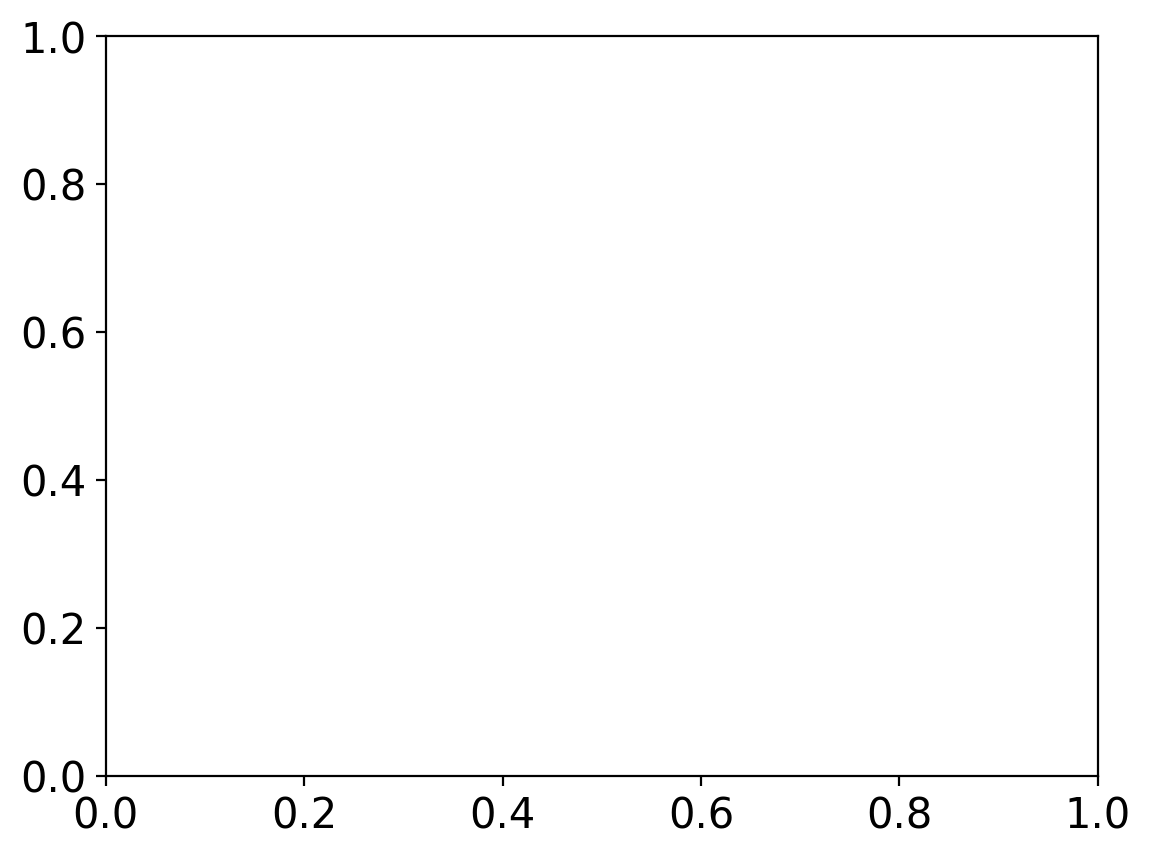

In [94]:
fig, ax = plt.subplots()
fig.get_axes()


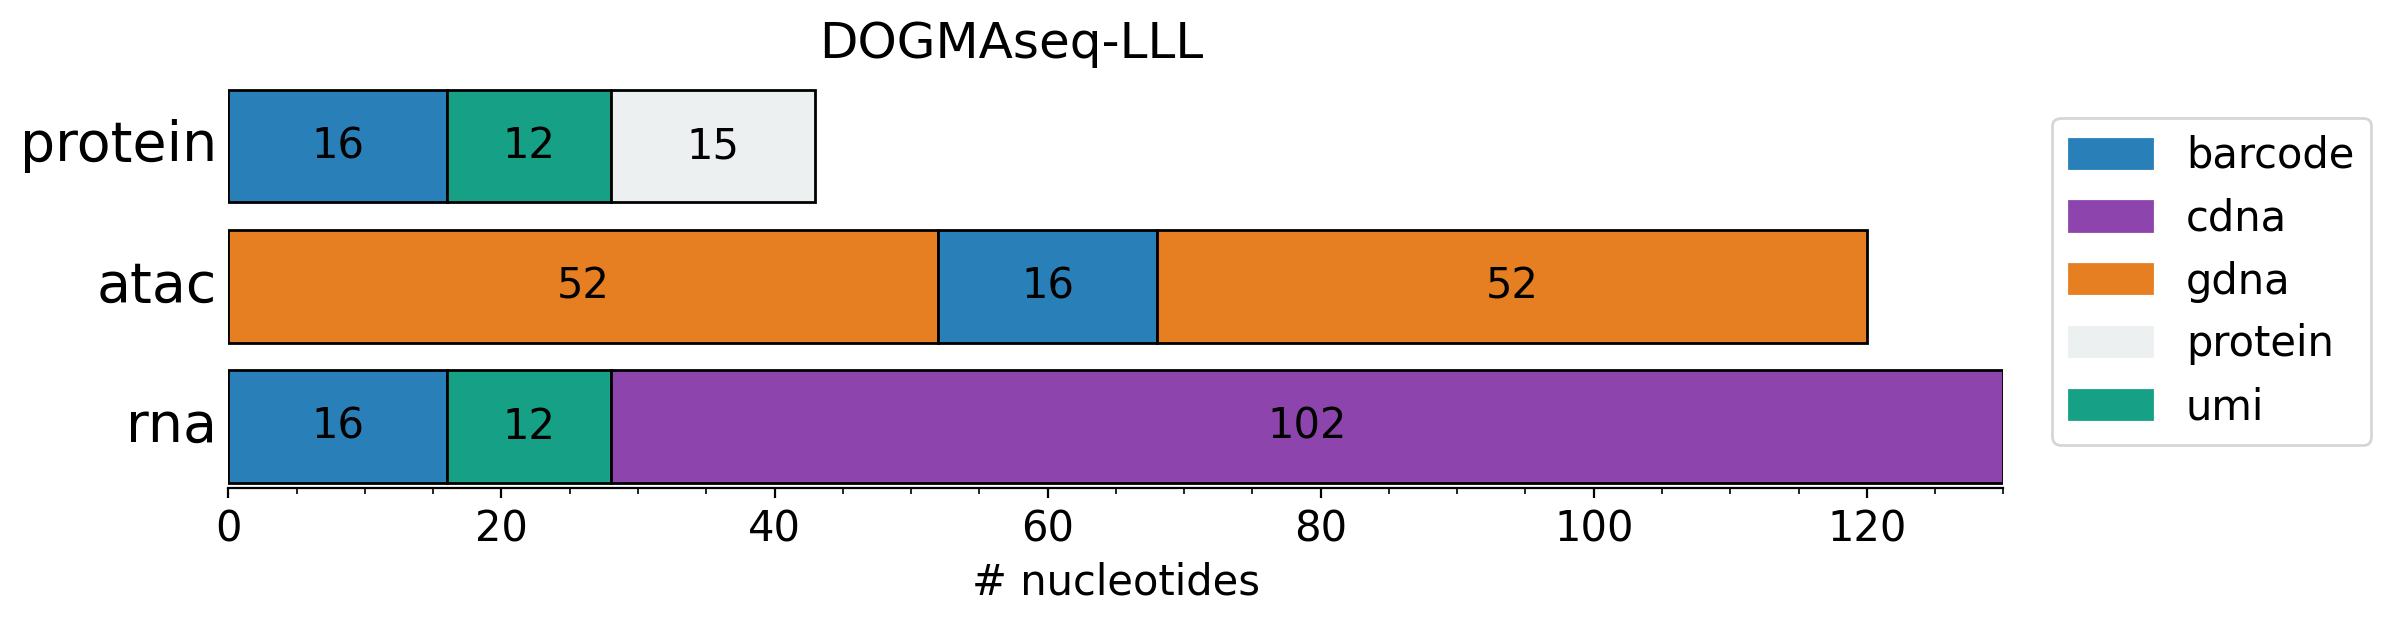

In [96]:
fig, axs = plt.subplots(figsize=(10,1*nmodes), nrows=nmodes, constrained_layout=True)
fig.suptitle("DOGMAseq-LLL")
rts = []
for m,ax in zip(modes,fig.get_axes()):
  # get leaves
  leaves = m.get_leaves()

  # setup plotting variables
  y = 0
  x = 0
  height = 1

  for idx, node in enumerate(leaves):
    # region tupe
    rtype = node.region_type.lower()
    # add to the global list so we can make a legend
    rts.append(rtype)
    # get region properties
    length = node.min_len
    label = f"{length}"

    # setup rectangle for the region
    rectangle = Rectangle((x, y), length, height, color=colors[rtype], ec='black')

    # write in the length of the region in the rectangle
    ax.text(x + length/2, y + height/2, label, horizontalalignment='center', verticalalignment='center')#, rotation=90)
    # add the rectangle
    ax.add_patch(rectangle)

    # add length to x for next region
    x += length

  ax.autoscale()

  # since all axes use the same scale, set the xlim to be 0 to the max length
  ax.set(**{
      "xlim": (0,max(lengths))
  })

  # hide the spines
  ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
  # Hide the axis and ticks and labels
  ax.xaxis.set_visible(False)
  ax.set_yticklabels([])
  ax.set_yticks([])

  # label the modality on the ylabel
  ax.set_ylabel(m.region_type, rotation=0, fontsize=20, ha="right", va="center")

# adjust the xaxis for the last modality to show the length
ax.xaxis.set_visible(True)
ax.spines[['bottom']].set_visible(True)
ax.minorticks_on()

ax.set(**{
    "xlabel": "# nucleotides",
})

# setup the figure legend
handles = []
for t in sorted(set(rts)):
  handles.append(mpatches.Patch(color=colors[t], label=t))
fig.legend(handles=handles, loc='center', bbox_to_anchor=(1.1, 0.55))

fig.show()